# Multi-Class Classification with a Single-Layer Perceptron Model  

In Machine Learning, learning and implementing classification models are a fundamental step on any data scientist's journey. Here in this post, we will delve into the realm of multi-class classification problems, exploring fundamental concepts and applying a single-layer perceptron model to attack this problem. 

Whether a seasoned veteran or just a beginner in this field, this tutorial aims to be your guide to approaching multi-class classification with neural networks. We will walk through all the essential steps of a standard machine learning project pipeline, from data preprocessing and model building to final evaluations. 

We'll be working with the Penguins dataset, a newer replacement for the classic Iris dataset introduced by Ronald Fisher in 1936. This dataset, available from the seaborn library, contains information about 3 penguin species. Each sample contains several informative features which provide insight into the characteristics of the different penguin species. The data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER (an abbreviation for Long Term Ecological Research).

# Single-Layer Perceptron  
So, what even is a single-layer perceptron (SLP) model anyways? An SLP model is one of the most simple forms of an artificial neural network. Just as its name implies, it is characterized by having only a single hidden layer of neurons responsible for making predictions. It is a type of feedforward neural network, where data only flows forwards from the input layer, through the hidden layer, and then to the output layer.  

The input layer will consist of nodes representing the features of the input data, with each node corresponding to a feature. Then, we have the hidden layer, with as many, or as few, nodes as you want. To keep this tutorial concise, this layer's size will equal that of the input layer. There is much research done in the realm of optimizing hidden layer architecture that we simply cannot cover it here, but if you are interested, the internet is your friend. Finally, data will come from the hidden layer into the output layer. For our case, we have 3 classes to predict, so we will have three nodes which each output the probability for one of those classes.  

Our model's architecture will resemble something like the graphic below:
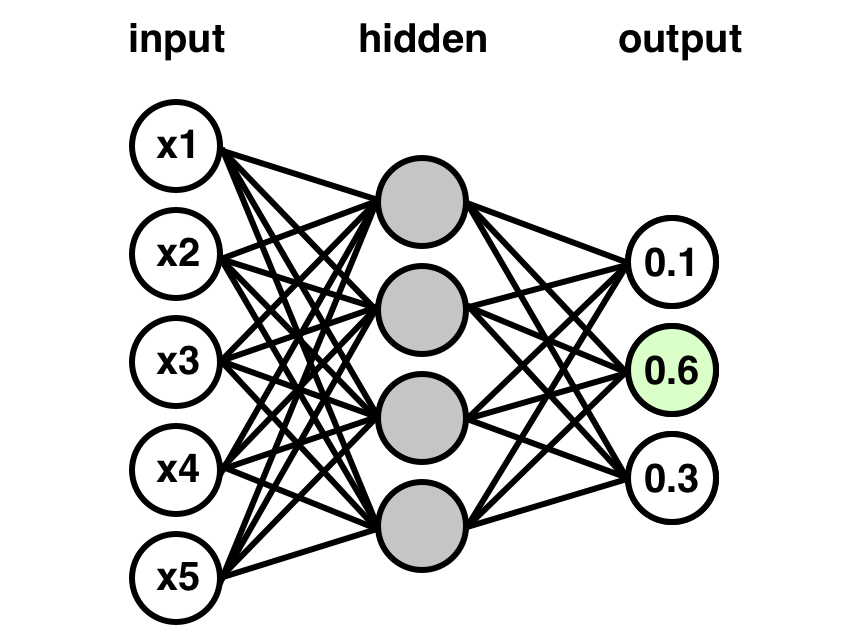

# Imports
Now that we have some background, let's start with the imports required for this project. Here we will use pandas and numpy for most of our data preparation needs. Seaborn is where our dataset will come, and along with matplotlib, will help us with some data visualizations down the line. Sklearn gives us easy ways to split our data as well as score our final predictions. Finally, our neural network model will be built using keras.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Data Preprocessing

First, let's load the penguins dataset to take a look at it. Luckily, sns has a nice built-in function to load this dataset. The data is returned as a pandas dataframe, so keep that in mind.

In [2]:
data = sns.load_dataset('penguins')
print(data.shape)
data.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Looks great! We can see that the first column ('species') is our target variable. Along with that, we get the following features which the model can use for predictions:
- island: The name of the island (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) where the penguin was found.
- bill_length_mm: The penguin's bill length in millimeters
- bill_depth_mm: The penguin's bill depth in millimeters
- flipper_length_mm: The penguin's flipper length in millimeters
- body_mass_g: The penguin's body mass in grams
- sex: The penguin's sex  

Some features are categorical, like species or island. Since neural networks require real-valued data to process, we are going to have to do something about that later.  
  
Also, you may see that there are some missing values in our dataset, labeled as NaN. This is a problem, but thankfully we have an easy solution. We can use pandas dropna() method to drop the rows which contain missing values.

In [3]:
data = data.dropna()
print(data.shape)
data.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Now, you can see that our dataset no longer has missing values, and we only had to drop 11 rows.  
  
So, what should we do about those categorical variables? How can we convert the species names to numerical values that the neural network can interpret?  
  
One popular method for this is called one-hot encoding. Essentially, we will make a column for each species and then place a value of 1 in that column if the penguin is that species.  
  
For example, here, we have 3 species of penguins (Chinstrap, Adeile, and Gentoo). So, we will create three columns (one for each species) and then place a value of 1 or 0, indicating whether that is the species of the penguin.  
  
First though, we have to get from the species names to some integer values. For this, we can use sklearn's LabelEncoder().

In [4]:
# Encode labels as integers
labels = sk.preprocessing.LabelEncoder().fit_transform(data.iloc[:, 0].values)
np.unique(labels)

array([0, 1, 2])

Now, each species string has been assigned to an integer value. In our case:
- 0 indicates Adeile
- 1 indicates Chinstrap
- 2 indicates Gentoo

Next, we can one-hot encode these integer labels using a function from keras called to_categorical(). Afterwards, we will get 3 new columns for each species of penguin.

In [5]:
# One hot encode labels
one_hot_labels = to_categorical(labels)
np.unique(one_hot_labels, axis=0)

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

We now have our one-hot encoded variable. Our model will now be able to correctly process this.  
  
In the next code chunks, we do the exact same thing to the 'island' and 'sex' features in our dataset and then replace the original columns in the dataframe with these new columns.

In [6]:
# Encode other categorical features
    # Island
island_labels = sk.preprocessing.LabelEncoder().fit_transform(data.iloc[:, 1].values)
one_hot_islands = to_categorical(island_labels)
    
    # Sex
sex_labels = sk.preprocessing.LabelEncoder().fit_transform(data.iloc[:, -1].values)
one_hot_sex = to_categorical(sex_labels)

In [7]:
# Aggregate back to dataframe

    # Remove species column, add one-hot-encoded species features
processed_data = data.copy().drop('species', axis=1)
for idx,species in zip([0,1,2], data['species'].unique()[::-1]):
    processed_data.insert(0, species, one_hot_labels[:, -(idx+1)])
    
    # Remove island column, add one-hot-encoded island features
processed_data = processed_data.drop('island', axis=1)
for idx,island in zip([0,2,1], data['island'].unique()):
    processed_data.insert(3, island, one_hot_islands[:, -(idx+1)])
    
    # Remove sex column, add one-hot-encoded sex features
processed_data = processed_data.drop('sex', axis=1)
for idx,sex in zip([1,0], data['sex'].unique()):
    processed_data.insert(10, sex, one_hot_sex[:, idx])
    
processed_data

,Adelie,Chinstrap,Gentoo,Dream,Biscoe,Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Female,Male
0,1.0,0.0,0.0,0.0,0.0,1.0,39.1,18.7,181.0,3750.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,39.5,17.4,186.0,3800.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,40.3,18.0,195.0,3250.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,36.7,19.3,193.0,3450.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,39.3,20.6,190.0,3650.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.0,0.0,1.0,0.0,1.0,0.0,47.2,13.7,214.0,4925.0,1.0,0.0
340,0.0,0.0,1.0,0.0,1.0,0.0,46.8,14.3,215.0,4850.0,1.0,0.0
341,0.0,0.0,1.0,0.0,1.0,0.0,50.4,15.7,222.0,5750.0,0.0,1.0
342,0.0,0.0,1.0,0.0,1.0,0.0,45.2,14.8,212.0,5200.0,1.0,0.0


With all that done, our dataset is fully real-valued. So far, we have dropped missing values and one-hot encoded the categorical features.  
  
Next up, we have to get our X (features) and y (target) and do some scaling. Scaling is crucial for neural networks because it helps ensure that the input features will contribute equally to the training process. If we do not scale our data, the features with larger values (like body mass in our case) will dominate the learning process. When features are on different scales, our optimization algorithm may take longer to converge or struggle to find an optimal solution. Scaling promotes a more stable and efficient training process. Here we will use sklearn's MinMaxScaler() to scale our values between 0 and 1.  
  
While we are messing with X and y, we might as well also split our data into train and validation sets with sklearn's train_test_split(). We will be using a test size of 1/3, meaning that our remaining 2/3 of data will be used for training.

In [8]:
# Get X and y
X = processed_data.iloc[:, 3:].values
y = processed_data.iloc[:, :3].values

# Scale data
scaler = sk.preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Train-test split 2/3:1/3
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=1/3,
                                                  stratify=y)


# Building our Model
And that concludes the data preprocessing step! Woooo  
  
Finally, we can get on to building the neural network to actually make some predictions. Below, we build a simple, single-layer perceptron classifier to train.  
  
Our layer sizes from input to output go: 9 > 9 > 3.  
  
We have 9 features to input, then we will have a hidden layer of 9 nodes to train to make some predictions. These predictions will then be output as 3 values. Each value in the output corresponds to the probability that a sample is of a specific class.  
  
We use the rectified linear unit (relu) function as the activation for the hidden layer. This allows us to impose a restriction on the output of the nodes in the hidden layer and mitigate the vanishing gradient problem. There are many types of activation functions, each with their own set of pros and cons. For our simple example though, this will work perfectly. Additionally, you can see that the output layer has a softmax activation function. We use this because the softmax function squishes the outpus into the range of (0, 1) and transforms the output from our hidden layer into a vector which represents the probabilities of our classes.

In [79]:
import tensorflow as tf
tf.random.set_seed(12)
# Build slp classifier
slp_clf = Sequential()
slp_clf.add(Input(X.shape[1]))
slp_clf.add(Dense(X.shape[1], activation='relu'))
slp_clf.add(Dense(3, activation='softmax'))

With the model set in place, we can now compile and fit the model. Also, we will train our model with early stopping to make sure we dont overfit due to too many epochs. We will monitor the validation loss starting from epoch 10. If it does not improve over the course of 5 consecutive epochs, then we will stop training.  
  
When compiling the model, we can use categorical crossentropy as our loss. This loss function is designed to compare probability distributions, and thus will work well in combination with our softmax activation function from earlier to tell us how far our model is from predicting classes correctly. Finally, we will monitor the accuracy of the model during training, as it is more easily interpretable. The accuracy metric tells us the fraction of correctly classified instances out of the total. A perfect model will score 1 here.  
  
Finally, we can fit our model. We provide X_train and y_train to train the model on. The epochs here is set abitrarily large so that we can stop training when the early stopping kicks in. Since our dataset is small, a smaller batch size of 16 is also used. Lastly, validation data is provided along with our callback to stop early. 

In [80]:
# Early Stopping
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=3,
                                           start_from_epoch=10)

# Compile
slp_clf.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit
history = slp_clf.fit(X_train,
                      y_train,
                      epochs=500,
                      batch_size=16,
                      verbose=2,
                      validation_data=(X_val, y_val),
                      callbacks=[stop_early])

Epoch 1/500
14/14 - 1s - loss: 1.0312 - accuracy: 0.4505 - val_loss: 0.9639 - val_accuracy: 0.4775 - 1s/epoch - 104ms/step
Epoch 2/500
14/14 - 0s - loss: 0.9968 - accuracy: 0.4505 - val_loss: 0.9353 - val_accuracy: 0.4775 - 50ms/epoch - 4ms/step
Epoch 3/500
14/14 - 0s - loss: 0.9624 - accuracy: 0.4820 - val_loss: 0.9051 - val_accuracy: 0.5225 - 51ms/epoch - 4ms/step
Epoch 4/500
14/14 - 0s - loss: 0.9277 - accuracy: 0.5045 - val_loss: 0.8732 - val_accuracy: 0.5586 - 52ms/epoch - 4ms/step
Epoch 5/500
14/14 - 0s - loss: 0.8916 - accuracy: 0.5495 - val_loss: 0.8405 - val_accuracy: 0.6757 - 51ms/epoch - 4ms/step
Epoch 6/500
14/14 - 0s - loss: 0.8532 - accuracy: 0.6081 - val_loss: 0.8050 - val_accuracy: 0.6937 - 77ms/epoch - 6ms/step
Epoch 7/500
14/14 - 0s - loss: 0.8142 - accuracy: 0.6622 - val_loss: 0.7678 - val_accuracy: 0.7477 - 147ms/epoch - 10ms/step
Epoch 8/500
14/14 - 0s - loss: 0.7743 - accuracy: 0.7568 - val_loss: 0.7320 - val_accuracy: 0.8288 - 84ms/epoch - 6ms/step
Epoch 9/500
14

14/14 - 0s - loss: 0.1617 - accuracy: 0.9955 - val_loss: 0.1768 - val_accuracy: 1.0000 - 111ms/epoch - 8ms/step
Epoch 68/500
14/14 - 0s - loss: 0.1585 - accuracy: 0.9955 - val_loss: 0.1744 - val_accuracy: 0.9910 - 61ms/epoch - 4ms/step
Epoch 69/500
14/14 - 0s - loss: 0.1557 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 1.0000 - 77ms/epoch - 5ms/step
Epoch 70/500
14/14 - 0s - loss: 0.1527 - accuracy: 0.9955 - val_loss: 0.1679 - val_accuracy: 0.9910 - 82ms/epoch - 6ms/step
Epoch 71/500
14/14 - 0s - loss: 0.1500 - accuracy: 1.0000 - val_loss: 0.1650 - val_accuracy: 1.0000 - 93ms/epoch - 7ms/step
Epoch 72/500
14/14 - 0s - loss: 0.1474 - accuracy: 1.0000 - val_loss: 0.1618 - val_accuracy: 1.0000 - 61ms/epoch - 4ms/step
Epoch 73/500
14/14 - 0s - loss: 0.1446 - accuracy: 1.0000 - val_loss: 0.1590 - val_accuracy: 1.0000 - 56ms/epoch - 4ms/step
Epoch 74/500
14/14 - 0s - loss: 0.1421 - accuracy: 1.0000 - val_loss: 0.1562 - val_accuracy: 1.0000 - 56ms/epoch - 4ms/step
Epoch 75/500
14/14 -

Epoch 133/500
14/14 - 0s - loss: 0.0528 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 1.0000 - 52ms/epoch - 4ms/step
Epoch 134/500
14/14 - 0s - loss: 0.0522 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 1.0000 - 50ms/epoch - 4ms/step
Epoch 135/500
14/14 - 0s - loss: 0.0515 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 1.0000 - 52ms/epoch - 4ms/step
Epoch 136/500
14/14 - 0s - loss: 0.0508 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 1.0000 - 53ms/epoch - 4ms/step
Epoch 137/500
14/14 - 0s - loss: 0.0501 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 1.0000 - 56ms/epoch - 4ms/step
Epoch 138/500
14/14 - 0s - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 1.0000 - 54ms/epoch - 4ms/step
Epoch 139/500
14/14 - 0s - loss: 0.0489 - accuracy: 1.0000 - val_loss: 0.0530 - val_accuracy: 1.0000 - 55ms/epoch - 4ms/step
Epoch 140/500
14/14 - 0s - loss: 0.0483 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 1.0000 - 51ms/epoch - 4ms/step


Epoch 199/500
14/14 - 0s - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000 - 57ms/epoch - 4ms/step
Epoch 200/500
14/14 - 0s - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 1.0000 - 56ms/epoch - 4ms/step
Epoch 201/500
14/14 - 0s - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 1.0000 - 54ms/epoch - 4ms/step
Epoch 202/500
14/14 - 0s - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 1.0000 - 57ms/epoch - 4ms/step
Epoch 203/500
14/14 - 0s - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000 - 54ms/epoch - 4ms/step
Epoch 204/500
14/14 - 0s - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 1.0000 - 53ms/epoch - 4ms/step
Epoch 205/500
14/14 - 0s - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 1.0000 - 55ms/epoch - 4ms/step
Epoch 206/500
14/14 - 0s - loss: 0.0253 - accuracy: 0.9955 - val_loss: 0.0269 - val_accuracy: 1.0000 - 53ms/epoch - 4ms/step


Our model appears to have been capable of perfect accuracy on the both the training and validation sets. This is great!  
  
Please, however, note that it is very uncommon to get such an accuracy in the real world, and this does not mean that the model will perform perfectly in predicting the species of new data points. All this means is that our model has converged to an optimal solution for the data it was provided with. Which is still a great feat!  
  
To make sure nothing funky went on during training, lets visualize our training and validation losses. For this we can use the seaborn library along with matplot lib to produce some aesthetically pleasing plots. We will use the history from when we fit the model to pull our losses from, and plot the values on a lineplot.

Text(0, 0.5, 'Loss (categorical crossentropy)')

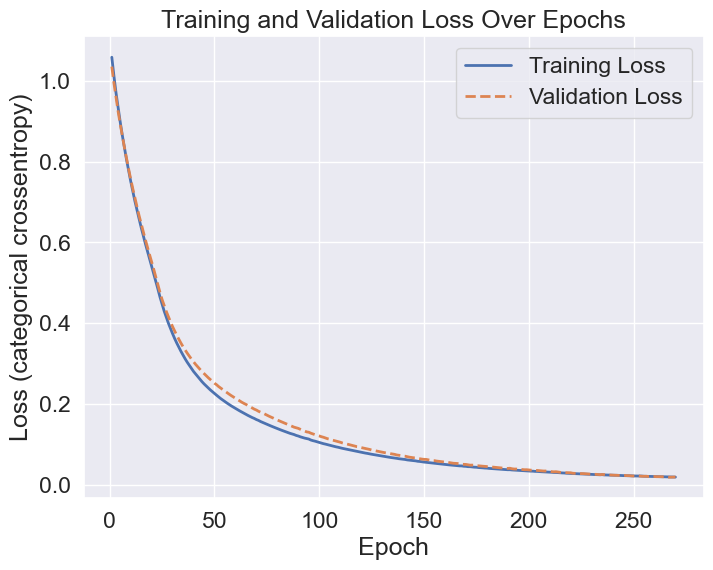

In [60]:
plt.figure(figsize=(8,6))
sns.set_style(style="darkgrid")
sns.set(font_scale = 1.5)
sns.lineplot(x = range(1, len(history.history['loss']) + 1),
             y = history.history['loss'],
             label = 'Training Loss',
             linewidth = 2)
sns.lineplot(x = range(1, len(history.history['val_loss']) + 1),
             y = history.history['val_loss'],
             label = 'Validation Loss',
             linewidth = 2,
             linestyle = '--')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (categorical crossentropy)')



The training curve is smooth. This is a good sign. A smooth curve indicates a stable learning process. As we train on further epochs, our loss falls gradually. Also, it is important to note that both the training loss and validation loss are almost equal. Remember that our model was never trained with the validation set. Thus, our model performed just as well on the unseen validation set as it did on the training set. With almost no difference in these two losses, we can be sure that we did not overfit the training set and have built a generalizable model.  
  
# Evaluations and Metrics
Using our newly trained model, we can produce some evaluation metrics and visualizations to intepret the performance of our model. Our first step is to use our trained model to predict on the validation set (which it has not seen yet). This gives us a 2D-array of 3 columns and some class probabilities. Something like: \[P1, P2, P3\]. From that, we can use np.argmax to return the index of the maximum value in that array. This gets us from probabilities to a label of the class with the highest probability.  

With classification problems, a popular way to evaluate performance is with a confusion matrix. This identifies any difference between the actual labels and the labels that our model predicted using a matrix. To make the confusion matrix, we just give our predictions and the true values to sklearn's confusion_matrix() function. Then we make a dataframe and add our species labels for seaborn to plot later.    
  
Along with the matrix, we can print the precision, recall, and f1 scores of our model. In binary classification, precision is the ratio of correctly predicted positive samples to the total predicted positive samples. Recall, on the other hand, is the ratio of correctly predicted positive samples to the total actual positive samples. In general, high precision means that when a model predicts a positive class, it is likely correct. High recall would mean that the model is good at identifying most positive class samples. F1 score simply combines these two ideas into one single metric. Unfortunately, since we are doing a multiclass classification, we must do some extra work (not really). We simply must choose how we want to average our precision and recall scores for each class. For our case, we will use macro-averaging. A nice graphic to explain this process is below:  
  
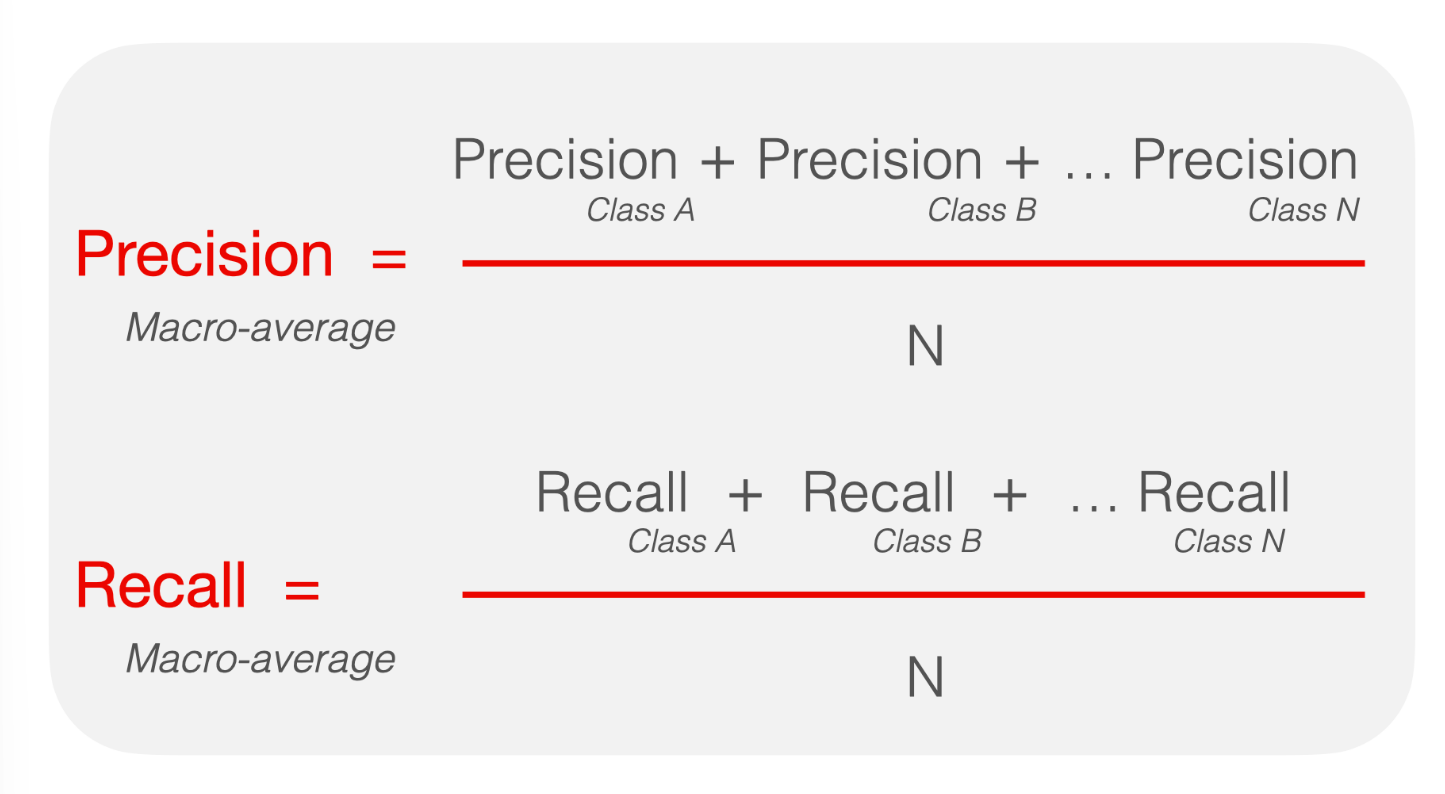
Here, N is the number of total classes. With this averaging technique, we can report the average precision, recall, and f1 scores for predictions on our validation set.  
  
Then, with seaborn, we can use a heatmap to visualize our confusion matrix and add some titles and labels to pretty it up.

Precision: 1.000
Recall: 1.000
F1: 1.000


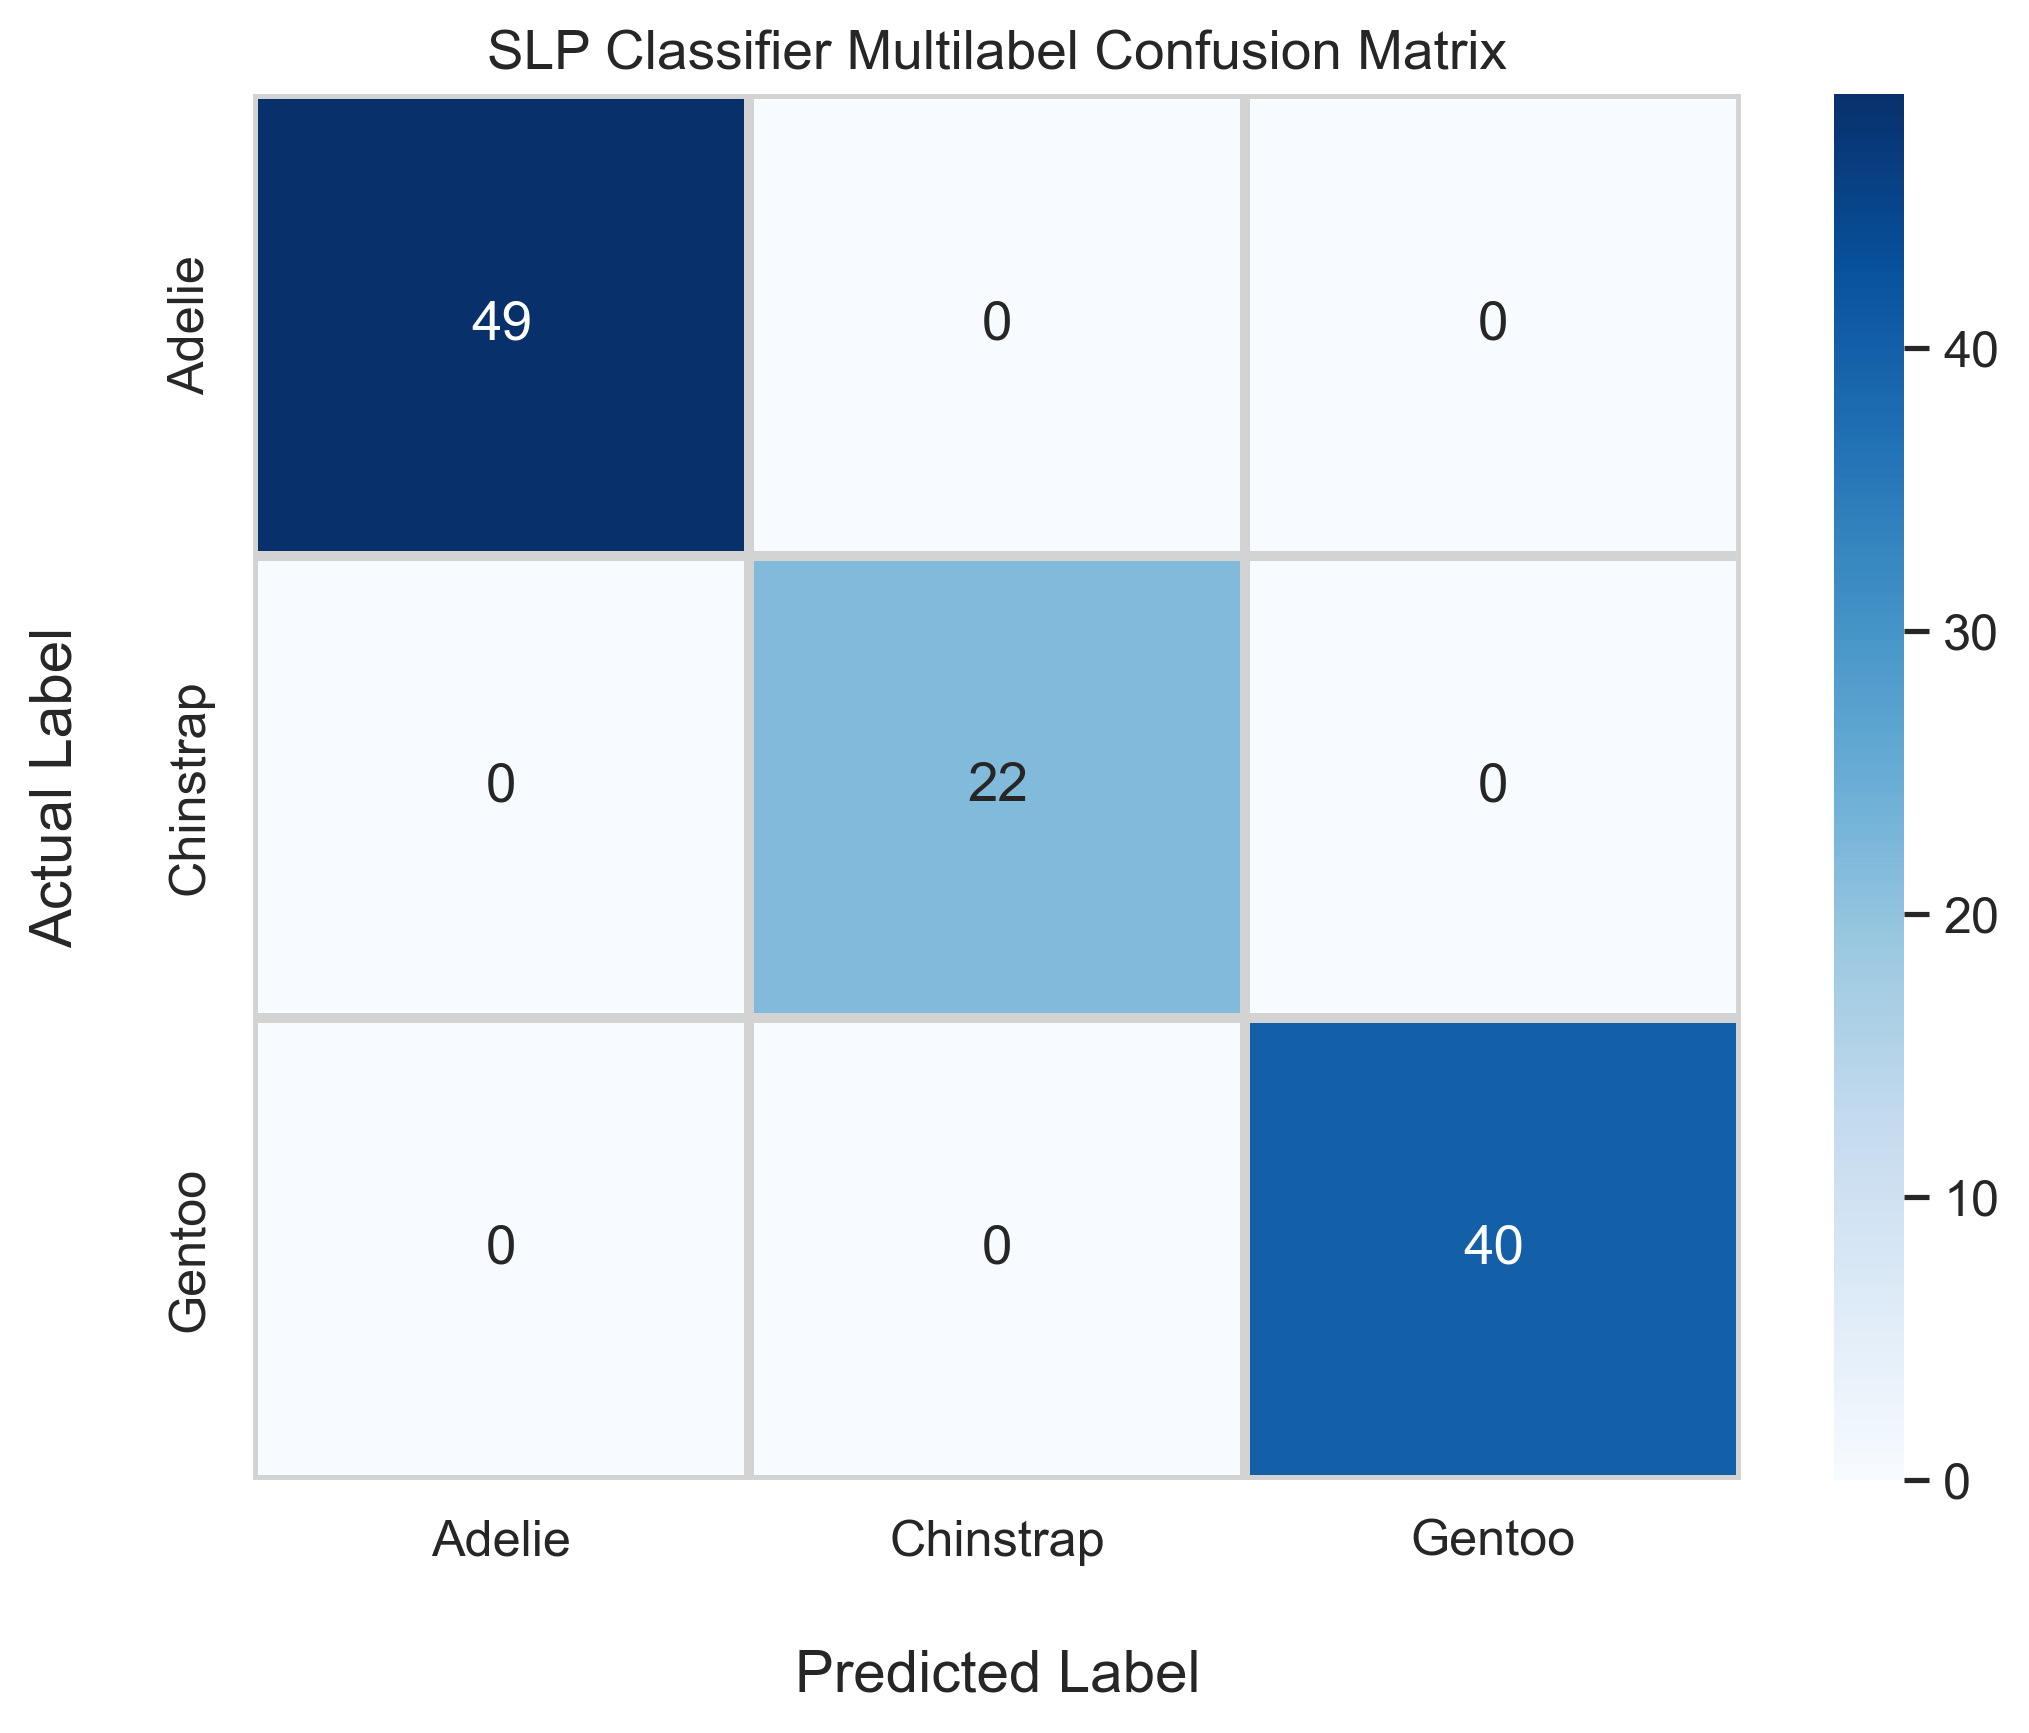

In [69]:
# Predict
y_pred = np.argmax(slp_clf.predict(X_val, verbose=0), axis=1)

# Make Confusion Matrix
cm = sk.metrics.confusion_matrix(np.argmax(y_val, axis=1), y_pred)
cm_df = pd.DataFrame(cm,
                     index = data['species'].unique(),
                     columns = data['species'].unique())

# Print evaluation metrics
print(f'Precision: {sk.metrics.precision_score(np.argmax(y_val, axis=1), y_pred, average="macro"):.3f}')
print(f'Recall: {sk.metrics.recall_score(np.argmax(y_val, axis=1), y_pred, average="macro"):.3f}')
print(f'F1: {sk.metrics.f1_score(np.argmax(y_val, axis=1), y_pred, average="macro"):.3f}')

# Display Confusion Matrix
plt.figure(figsize=(8,6), dpi=300)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cm_df, annot=True, fmt='d', linewidths=2, linecolor='#d3d3d3', cmap='Blues')
ax.set_title('SLP Classifier Multilabel Confusion Matrix')
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Label", fontsize=14, labelpad=20)
plt.show()

Since our model achieved perfect accuracy, we see that all of the actual and predicted labels match up exactly. We did not wrongly predict a single sample! This is also why all of our evaluation metrics are 1. Out of the 49 Adelie samples, we predicted all of them correctly. The same goes for Chinstrap and Gentoo penguins too.
  
# Conclusion
To wrap up, throughout this post we have worked through an entire machine learning classification problem from start to finish. From data to predictions, we dove into some fundamental topics such as handling missing data values, one-hot encoding, as well as building and training a simple neural network model to just name a few.  
  
By leveraging state-of-the-art python libraries like NumPy, Keras, and Scikit-Learn, we gained hands-on experience in implementing and training a neural network model on a real dataset. With neural networks, we even covered some crucial concepts like activation and loss functions. While our single-layer perceptron model may have been simple, it serves as a fundamental building block in neural networks and lays the groundwork for understanding more complex architectures down the line. With this in mind, we can move onto bigger and more complex problems and model types in the future. If you've gotten this far, I encourage anyone reading this to remember that this is just the starting point on your journey through this hellscape (it really isn't that bad when you get into it though) of machine learning in the modern era. After this, the doors are open. For better or for worse.  
  
So, to conclude, Good luck out there, soldier!
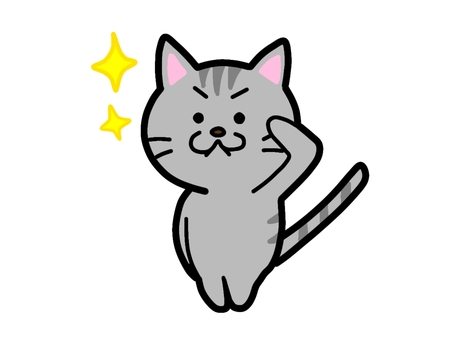